In [20]:
#Import

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import requests
import json
import hvplot.pandas
import plotly.express as px
from pathlib import Path

%matplotlib inline


In [51]:
sp_500_history = pd.read_json (r'../../data/rawdata/sp_500_history.json')
sp_500_history.head(3)

dateAdded       addedSecurity removedTicker  removedSecurity  \
0  March 22, 2021                               FLS        Flowserve   
1  March 22, 2021  NXP Semiconductors                                  
2  March 22, 2021                               SLG  SL Green Realty   

        date                         reason symbol  
0 2021-03-22  Market capitalization change.    FLS  
1 2021-03-22  Market capitalization change.   NXPI  
2 2021-03-22  Market capitalization change.    SLG

In [31]:
sp_500_added = sp_500_history[['dateAdded','addedSecurity','symbol','reason']]
sp_500_added

dateAdded         addedSecurity symbol  \
0      March 22, 2021                          FLS   
1      March 22, 2021    NXP Semiconductors   NXPI   
2      March 22, 2021                          SLG   
3      March 22, 2021  Penn National Gaming   PENN   
4      March 22, 2021                          XRX   
..                ...                   ...    ...   
519  December 5, 2000       Ambac Financial    ABK   
520     July 27, 2000                          RAD   
521     July 27, 2000          JDS Uniphase   JDSU   
522  December 7, 1999                          LDW   
523  December 7, 1999                Yahoo!   YHOO   

                            reason  
0    Market capitalization change.  
1    Market capitalization change.  
2    Market capitalization change.  
3    Market capitalization change.  
4    Market capitalization change.  
..                             ...  
519            Market Cap changes.  
520             Market Cap change.  
521             Market Cap change.  
522             Market Cap change.  
523             Market Cap change.  

[524 rows x 4 columns]

In [41]:
#Remove the empty

nan_value = float("NaN")
sp_500_added.replace("", nan_value, inplace=True)
sp_500_added.dropna(subset = ["addedSecurity"], inplace=True)
print(sp_500_added)


             dateAdded             addedSecurity symbol  \
1       March 22, 2021        NXP Semiconductors   NXPI   
3       March 22, 2021      Penn National Gaming   PENN   
5       March 22, 2021          Generac Holdings   GNRC   
7       March 22, 2021     Caesars Entertainment    CZR   
9    February 12, 2021  Monolithic Power Systems   MPWR   
..                 ...                       ...    ...   
515   December 5, 2000       Symbol Technologies    SBL   
517   December 5, 2000          Allegheny Energy    AYE   
519   December 5, 2000           Ambac Financial    ABK   
521      July 27, 2000              JDS Uniphase   JDSU   
523   December 7, 1999                    Yahoo!   YHOO   

                                                reason  
1                        Market capitalization change.  
3                        Market capitalization change.  
5                        Market capitalization change.  
7                        Market capitalization change.  
9    T

/Users/jc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-a184f605f529>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



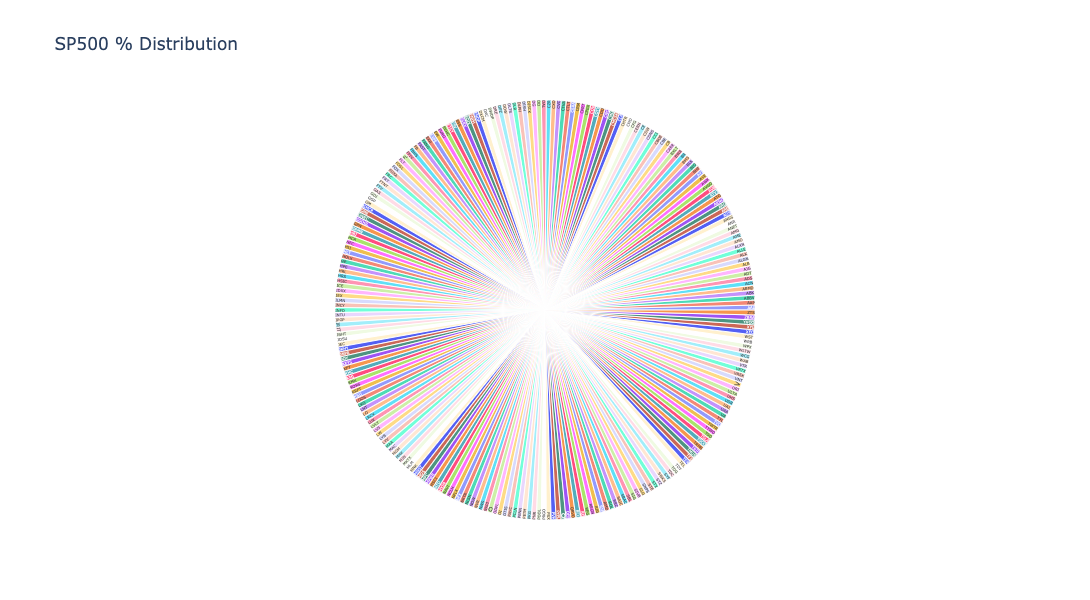

In [44]:
sp_500_added_plot = px.sunburst(
     sp_500_added,
     path=["symbol"],
     width=600,height=600,
    title='SP500 % Distribution',
)
sp_500_added_plot.show()

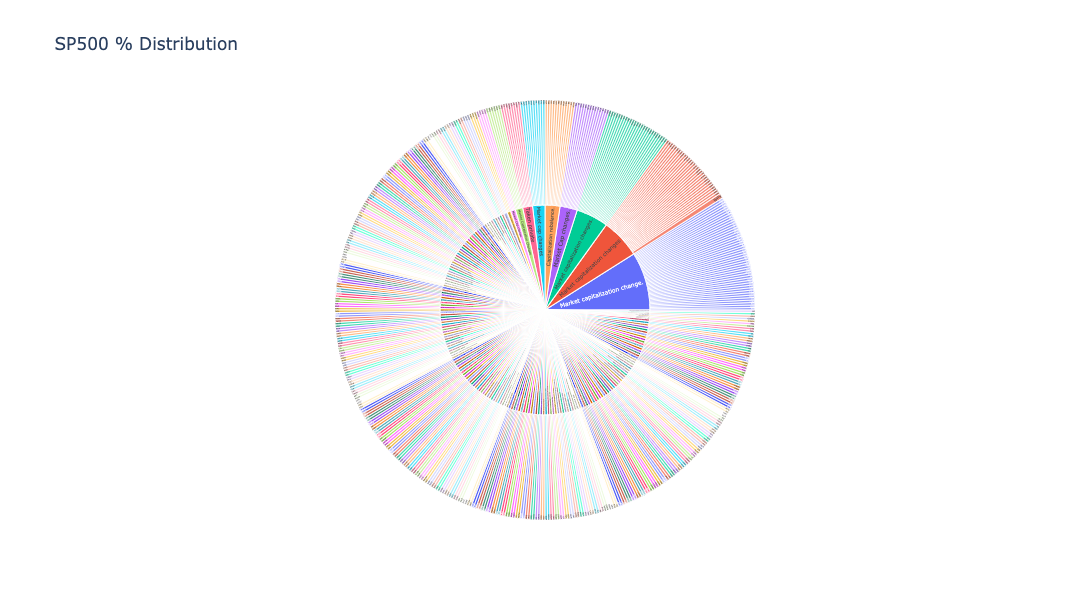

In [57]:
# Sunburst Plot Sector Distributions SP 500

sp500_add_plot = px.sunburst(
     sp_500_history,
     path=['reason', "symbol"],
     width=600,height=600,
    title='SP500 % Distribution',
)
sp500_add_plot.show()

In [3]:
nasdad_100_history = pd.read_json(r'../../data/rawdata/nasdaq_100_history.json')
nasdad_100_history

dateAdded addedSecurity removedTicker  \
0    December 21, 2020      Okta Inc          None   
1    December 21, 2020          None         LBTYA   
2    December 21, 2020          None         LBTYK   
3    December 21, 2020          None          TTWO   
4    December 21, 2020          None          ULTA   
..                 ...           ...           ...   
753   December 2, 1997          GENZ                 
754   December 2, 1997          GNCI                 
755   December 2, 1997   Gartner Inc                 
756   December 2, 1997          FORE                 
757   December 2, 1997    Fiserv Inc                 

                        removedSecurity       date  \
0                                  None 2020-12-21   
1                    Liberty Global plc 2020-12-21   
2                    Liberty Global plc 2020-12-21   
3    Take-Two Interactive Software, Inc 2020-12-21   
4                      Ulta Beauty, Inc 2020-12-21   
..                                  ...        ...   
753                                     1997-12-02   
754                                     1997-12-02   
755                                     1997-12-02   
756                                     1997-12-02   
757                                     1997-12-02   

                            reason symbol  
0     Market capitalization change   OKTA  
1     Market capitalization change  LBTYA  
2     Market capitalization change  LBTYK  
3     Market capitalization change   TTWO  
4     Market capitalization change   ULTA  
..                             ...    ...  
753  Market capitalization change.   GENZ  
754  Market capitalization change.   GNCI  
755  Market capitalization change.     IT  
756  Market capitalization change.   FORE  
757  Market capitalization change.   FISV  

[758 rows x 7 columns]

In [4]:
dow_jones_history = pd.read_json(r'../../data/rawdata/dow_jones_history.json')
dow_jones_history

dateAdded                addedSecurity removedTicker  \
0   August 31, 2020           Salesforce.Com Inc                 
1   August 31, 2020                                        RTX   
2   August 31, 2020                                        PFE   
3   August 31, 2020  Honeywell International Inc                 
4   August 31, 2020                                        XOM   
..              ...                          ...           ...   
79  January 1, 1994                        BHMSQ                 
80  January 1, 1994                     AT&T Inc                 
81  January 1, 1994          American Express Co                 
82  January 1, 1994             Altria Group Inc                 
83  January 1, 1994                        3M Co                 

               removedSecurity       date                         reason  \
0                              2020-08-31  Market capitalization change.   
1   Raytheon Technologies Corp 2020-08-31   Market capitalization change   
2                   Pfizer Inc 2020-08-31   Market capitalization change   
3                              2020-08-31  Market capitalization change.   
4             Exxon Mobil Corp 2020-08-31   Market capitalization change   
..                         ...        ...                            ...   
79                             1994-01-01  Market capitalization change.   
80                             1994-01-01  Market capitalization change.   
81                             1994-01-01  Market capitalization change.   
82                             1994-01-01  Market capitalization change.   
83                             1994-01-01  Market capitalization change.   

   symbol  
0     CRM  
1     RTX  
2     PFE  
3     HON  
4     XOM  
..    ...  
79  BHMSQ  
80      T  
81    AXP  
82     MO  
83    MMM  

[84 rows x 7 columns]